In [6]:
import pandas as pd
import sklearn
import tpot
import matplotlib.pyplot as plt

In [2]:
tmp_150_A = pd.read_csv("raw_data/tmp/Table_150_A.ssv", sep="\s+").set_index("Sr.No.")
tmp_150_B = pd.read_csv("raw_data/tmp/Table_150_B.ssv", sep="\s+").set_index("Sr.No.")
tmp_170_A = pd.read_csv("raw_data/tmp/Table_170_A.ssv", sep="\s+").set_index("Sr.No.")
tmp_170_B = pd.read_csv("raw_data/tmp/Table_170_B.ssv", sep="\s+").set_index("Sr.No.")

A = pd.concat([tmp_150_A, tmp_170_A])
B = pd.concat([tmp_150_B, tmp_170_B])



In [56]:
df = A.join(B.drop(columns="MXene")).drop(columns="BG_GW")
target="BG_PBE"

# Train / Test Split
data_train, data_test = sklearn.model_selection.train_test_split(df.drop(columns=["MXene"]), test_size=0.8, random_state=1234)
train_x = data_train.drop(columns=target).to_numpy()
train_y = data_train[target].to_numpy()

test_x = data_test.drop(columns=target).to_numpy()
test_y = data_test[target].to_numpy()

# Train a model
model = tpot.TPOTRegressor(
    generations=2,
    population_size=100,
    max_eval_time_mins=5/60,
    cv=3,
    verbosity=2,
    scoring="r2",
    config_dict=tpot.config.regressor_config_dict,
    n_jobs=6,
    random_state=1234
)


In [57]:
model.fit(train_x, train_y)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.5631339699019842

Generation 2 - Current best internal CV score: 0.5631339699019842

Best pipeline: LassoLarsCV(LassoLarsCV(input_matrix, normalize=False), normalize=True)


TPOTRegressor(config_dict={'sklearn.cluster.FeatureAgglomeration': {'affinity': ['euclidean',
                                                                                 'l1',
                                                                                 'l2',
                                                                                 'manhattan',
                                                                                 'cosine'],
                                                                    'linkage': ['ward',
                                                                                'complete',
                                                                                'average']},
                           'sklearn.decomposition.FastICA': {'tol': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])},
                           'sklearn.decomposition.PCA': {'iter

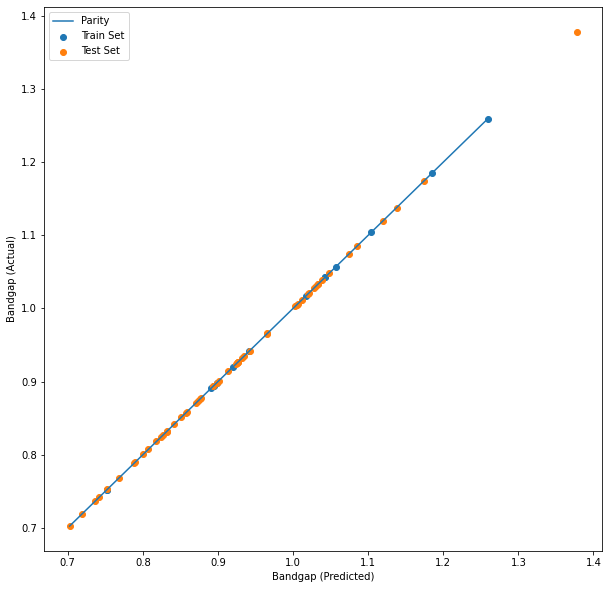

In [59]:
plt.rcParams["figure.figsize"]=[10,10]
train_y_pred = model.predict(train_x)
test_y_pred = model.predict(test_x)

plt.scatter(x=train_y_pred, y=train_y, label="Train Set")
plt.scatter(x=test_y_pred, y=test_y, label="Test Set")
min_val = min(map(min, train_y, test_y))
max_val = max(map(max, train_y, test_y))
plt.plot([min_val,max_val], [min_val,max_val], label="Parity")
plt.ylabel("Bandgap (Actual)")
plt.xlabel("Bandgap (Predicted)")
plt.legend()

In [49]:
data_train.columns.drop('BG_PBE')[model.fitted_pipeline_[0].get_support()]

AttributeError: 'StackingEstimator' object has no attribute 'get_support'

In [61]:
model.fitted_pipeline_

Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=LassoLarsCV(normalize=False))),
                ('lassolarscv', LassoLarsCV())])